In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

from matplotlib import pyplot as plt
import numpy as np

from utils.parse_pars import parse_pars
from spamm.run_spamm import spamm
from spamm.components.NuclearContinuumComponent import NuclearContinuumComponent
from spamm.Spectrum import Spectrum
from spamm.analysis import plot_best_models
from spamm.Samples import Samples

In [2]:
# Define the unit-less wavelength
test_wl = parse_pars()["testing"]
wl = np.arange(test_wl["wl_min"], test_wl["wl_max"], test_wl["wl_step"])

# Just generate a simple simple power law for a spectrum
nc_params = {"slope1": 1.5, "norm_PL": 1.5e-17}

comp_params = [nc_params["norm_PL"], nc_params["slope1"]]

nc = NuclearContinuumComponent()

# Make a Spectrum object with dummy flux and flux error
spectrum = Spectrum(wl, wl, wl)
nc.initialize(spectrum)

flux = NuclearContinuumComponent.flux(nc, spectrum, comp_params)
flux_err = flux * 0.35

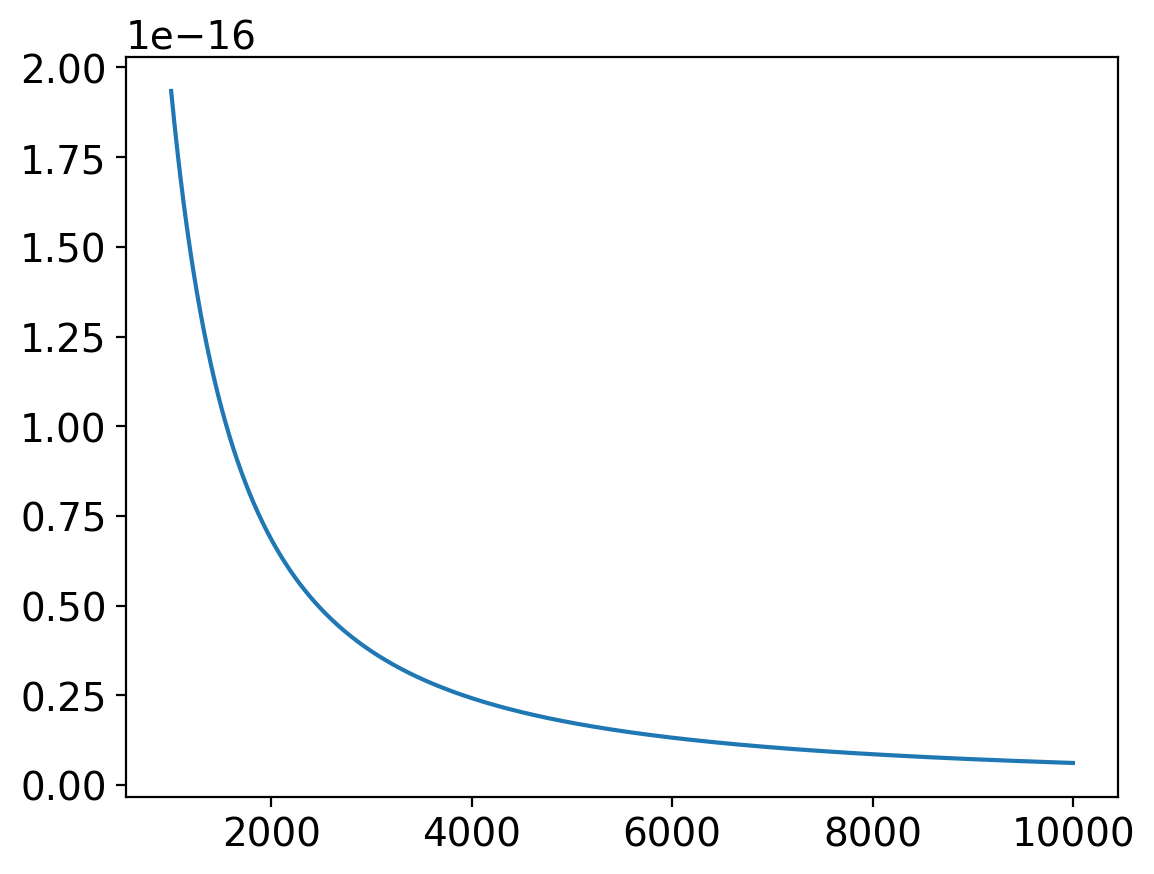

In [26]:
plt.plot(wl, flux)

In [27]:
# Run spamm
spamm_out = spamm(complist=['PL'], inspectrum=(wl, flux, flux_err), n_walkers=100, n_iterations=500,
                 outdir="pl_test", picklefile="powerlaw")

Adding wl to comp_params.

Adding flux to comp_params.

Adding err to comp_params.

Adding components to comp_params.



100%|█████████████████████████████████████████| 500/500 [00:09<00:00, 53.11it/s]


Mean acceptance fraction: 0.663
Saved pickle file pl_test/powerlaw.pickle.gz
Plotting the sample projections.
	Saved powerlaw_triangle.png
Plotting the MCMC chains.
	Saved powerlaw_chain.png
Plotting the model posterior PDFs.
	Saved powerlaw_posterior.png
Saved pl_test/powerlaw_posterior.pdf
executed in 0:00:11.639237


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
S = Samples("pl_test/powerlaw.pickle.gz")
plot_best_models(S)

	Saved {}_best.png
